In [1]:
import torch
import os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch import nn, optim
import pandas as pd
import numpy as np
from PIL import Image
from time import time
import matplotlib.pyplot as plt

In [2]:
class TrainDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open("data/training/"+single_image_name)

        t = transforms.Resize((60,171))
        
        img_as_img = t(img_as_img)
        
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)
        
        cropped_img = img_as_tensor[:,15:45,15:99]
        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]

        single_image_label = torch.tensor([single_image_label], dtype=torch.long)
        
        return (cropped_img, single_image_label)

    def __len__(self):
        return self.data_len

#if __name__ == "__main__":
    # Call dataset
#    custom_mnist_from_images =  \
#        CustomDatasetFromImages('data/training')
print("low")

low


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


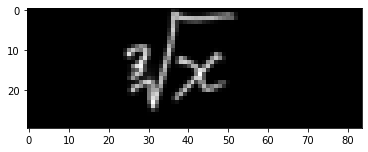

In [3]:
train_data = TrainDatasetFromImages('data/training/labels-tab-csv.csv')

#crop_data = []
#for i in range(860):
#    crop_data.append(train_data[i][0][:,15:45,15:99])
    

plt.imshow(train_data[2][0].numpy().squeeze(), cmap='gray_r');
print(train_data[2][0])

            
        


In [4]:
input_size = 2520
hidden_sizes = [250]
output_size = 11 #might be an issue

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.LogSoftmax(dim=1))

In [5]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_data))
images = images.reshape(images.shape[0], -1)
logps = model(images) 
print(images.shape, labels.shape)
loss = criterion(logps, labels)


optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.91)
time0 = time()
epochs = 75
for e in range(epochs):
    running_loss = 0
    for images, labels in train_data:
        images = images.reshape(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_data)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

torch.Size([1, 2520]) torch.Size([1])
Epoch 0 - Training loss: 2.5633507002231686
Epoch 1 - Training loss: 2.417129504542018
Epoch 2 - Training loss: 2.3511905574521355
Epoch 3 - Training loss: 2.2915032293907434
Epoch 4 - Training loss: 2.236939759933671
Epoch 5 - Training loss: 2.1868032417325085
Epoch 6 - Training loss: 2.1405287694792414
Epoch 7 - Training loss: 2.0976358473994012
Epoch 8 - Training loss: 2.057712793731412
Epoch 9 - Training loss: 2.020406942381415
Epoch 10 - Training loss: 1.9854155198779218
Epoch 11 - Training loss: 1.9524786854206129
Epoch 12 - Training loss: 1.921373332395803
Epoch 13 - Training loss: 1.8919079428322094
Epoch 14 - Training loss: 1.8639173646998959
Epoch 15 - Training loss: 1.8372592838177848
Epoch 16 - Training loss: 1.8118104782735192
Epoch 17 - Training loss: 1.787464246015216
Epoch 18 - Training loss: 1.7641272182294796
Epoch 19 - Training loss: 1.7417185323356197
Epoch 20 - Training loss: 1.7201665352943332
Epoch 21 - Training loss: 1.69940

In [6]:
valloader = TrainDatasetFromImages('data/training/labels-tab-csv.csv')

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].reshape(1, 2520)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    #print(pred_label)
    
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))



Number Of Images Tested = 860

Model Accuracy = 0.7430232558139535
